In [20]:
%pwd

'h:\\myjupyter\\SAR_ADC'

## Dependencies

In [36]:
# %pip install numpy matplotlib seaborn pandas
# !git clone https://github.com/lin-k23/SAR_ADC.git
import pandas as pd
import os
from script.preset_mdl import preset_mdl
from script.preset_pr import preset_pr
from script.signal_source import signal_source
from script.RISCA_core import RISCA_core
from script.analyser.analyser_new import Analyser
from script.util.load_assembler_xlsx import load_assembler_xlsx

## Set Parameters

In [37]:
mdl = preset_mdl()
pr = preset_pr()
pr['conf_name'] = input("sar/tisar/pipesar2s/nssar1o1c/nssar1o1ccp\n")
config_file_path = os.path.join("config",pr['conf_name'])
print(config_file_path)
pr_loaded = load_assembler_xlsx(config_file_path)
# update pr with pr_loaded
pr.update(pr_loaded)
if "T_assembler" in pr:
    print("Loaded Excel configuration:\n")
cfg_info = pd.DataFrame(pr["T_assembler"])
styled_df = cfg_info.style\
            .set_table_attributes('class="dataframe table table-striped"')\
            .set_properties(**{'text-align': 'center'})\
            .set_caption(f'Configuration Information for {pr["conf_name"]}')
styled_df

config\tisar
Loading file: config\tisar\timing_table.xlsx
[script.util.load_assembler_xlsx] parameter TI loaded: pr[TI]= 3
Loaded Excel configuration:



,frame1,frame2,frame3
Item,,,
CB1,OUT RST SAM1,MSB,LSB
CB2,LSB,OUT RST SAM1,MSB
CB3,MSB,LSB,OUT RST SAM1


## Run Simulator

In [38]:
# 定义输入信号峰值
v_in_peak = [pr["v_in_peak"], 0]
# 调用 signal_source 函数
v_in_p, v_in_n = signal_source(pr, mdl, v_in_peak)
# Instantiate the device under test
da = RISCA_core(mdl, pr, v_in_p, v_in_n)

## Analysis

[h:\myjupyter\SAR_ADC\script\analyser\analyser_new.py] ENoB=1.41, SNDR=10.2dB, SFDR=14.2dB, FoMs=126.2dB, FoMw=3313.8fJ, BW=200.0M, Power=1.00mW


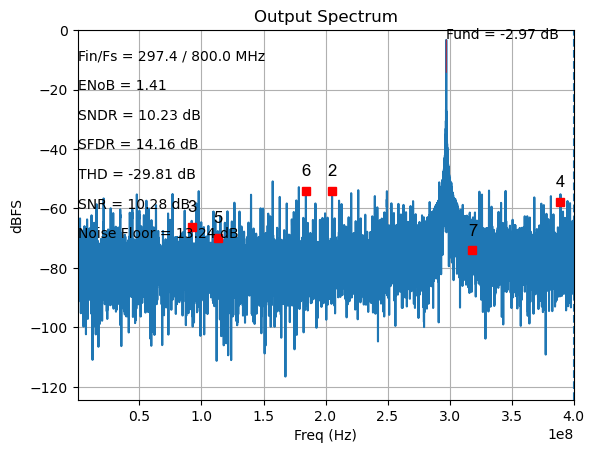

In [41]:
test = Analyser(da, pr)
test.mode_analyser()